# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Realce-de-Contraste-Interativo-utilizando-Janela-e-Nível" data-toc-modified-id="Realce-de-Contraste-Interativo-utilizando-Janela-e-Nível-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Realce de Contraste Interativo utilizando Janela e Nível</a></div><div class="lev2 toc-item"><a href="#Equação-da-função-de-realce-de-contraste" data-toc-modified-id="Equação-da-função-de-realce-de-contraste-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Equação da função de realce de contraste</a></div><div class="lev2 toc-item"><a href="#Implementação-da-Função-de-contraste-Window-&amp;-Level" data-toc-modified-id="Implementação-da-Função-de-contraste-Window-&amp;-Level-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Implementação da Função de contraste Window &amp; Level</a></div><div class="lev2 toc-item"><a href="#Imagem-original-e-seu-histograma" data-toc-modified-id="Imagem-original-e-seu-histograma-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Imagem original e seu histograma</a></div><div class="lev2 toc-item"><a href="#Calculando-e-visualizando-a-Transforma-de-Contraste-Window-&amp;-Level" data-toc-modified-id="Calculando-e-visualizando-a-Transforma-de-Contraste-Window-&amp;-Level-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Calculando e visualizando a Transforma de Contraste Window &amp; Level</a></div><div class="lev2 toc-item"><a href="#Aplicando-a-Transformação-de-Contraste" data-toc-modified-id="Aplicando-a-Transformação-de-Contraste-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Aplicando a Transformação de Contraste</a></div><div class="lev2 toc-item"><a href="#Visualizando-o-histograma-da-imagem-com-realce-de-contraste" data-toc-modified-id="Visualizando-o-histograma-da-imagem-com-realce-de-contraste-16"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Visualizando o histograma da imagem com realce de contraste</a></div><div class="lev2 toc-item"><a href="#Links-Interessantes" data-toc-modified-id="Links-Interessantes-17"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Links Interessantes</a></div>

# Realce de Contraste Interativo utilizando Janela e Nível


Em equipamentos interativos de visualização de imagens, é usual ter uma opção interativa
denominada "Window & Level contrast enhancement" que permite com auxílio do mouse mudar
o contraste da imagem de forma seletiva. A transformação de intensidade que é utilizada
é uma transformação linear aplicada na faixa de valores mínimo e máximo de nível de cinza
em que se deseja aumentar o contraste. Entretanto, em vez de alterar este dois parâmetros,
os dois parâmetros alterados são: *Window* que é a faixa entre o mínimo e máximo e o *Level*
que é o nível de cinza do centro da faixa. A vantagem desta forma de parametrizar é que
é possível por exemplo deixar uma janela fixa e alterar o nível de cinza do centro, dando um
maior controle ao usuário.

Uma demonstração interativa pode ser vista em

- [adessowiki:ws_demo2](http://adessowiki.fee.unicamp.br/adesso/wiki/Demo/ws_demo2/view/?usecache=0) 

que foi feita
em javascript pelo Luis Tavares durante o seu mestrado na FEEC-Unicamp. Experimente
esta ferramenta interativa e coloque a Janela em 5 e varie o Nível para a parte mais escura
e verifique que é possível verificar a distribuição dos pixels do ar, que está ao redor do
sujeito.

A demonstração a seguir é feita neste notebook, porém não de forma não interativa.

## Equação da função de realce de contraste

A equação da Transformação de contraste Window & Level é dada pela seguinte equação:

$$  \begin{matrix}
        T(p) &=& \lfloor\frac{255 (p - P_{min})}{P_{max} - P_{min}}\rfloor\\
        \text{onde}& &\\
        P_{min} &=& \max(0, L - \lfloor\frac{W}{2}\rfloor)\\
        P_{max} &=& \min(L + \lfloor\frac{W}{2}\rfloor, 255) 
    \end{matrix}
$$        

## Implementação da Função de contraste Window & Level

Como todo problema, existem inúmeras maneiras de se implementar em NumPy a função de contraste Janela e Nível.
A implementação a seguir faz uso da função ``linspace`` que gera a parte linear da função:

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import sys,os
ia898path = os.path.abspath('/etc/jupyterhub/ia898_1s2017/')
if ia898path not in sys.path:
    sys.path.append(ia898path)
import ia898.src as ia

In [3]:
   
def TWL(L,W):
    Pmin = max(0,L-W//2)
    Pmax = min(255,L+W//2)

    T = np.zeros(256, np.uint8)
    T[Pmin:Pmax+1] = np.floor(np.linspace(0, 255, num=(Pmax - Pmin + 1)))
    T[Pmax:] = 255
    return T

def WL(f,L,W):
    T = TWL(L,W)
    return T[f]

## Imagem original e seu histograma
    

""
Imagem Original

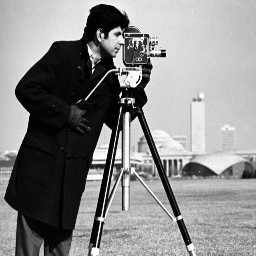

([<matplotlib.lines.Line2D at 0x7f9b4ce80ac8>],
 <matplotlib.text.Text at 0x7f9b2e279860>)

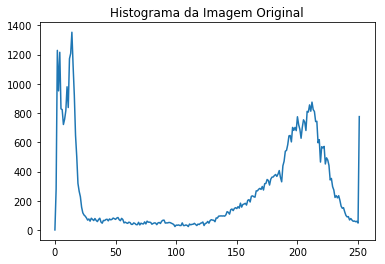

In [6]:
    # Imagem original
    f = mpimg.imread('../data/cameraman.tif')
    ia.adshow(f,'Imagem Original')
    
    h = ia.histogram(f)
    plt.plot(h), plt.title('Histograma da Imagem Original')

## Calculando e visualizando a Transforma de Contraste Window & Level

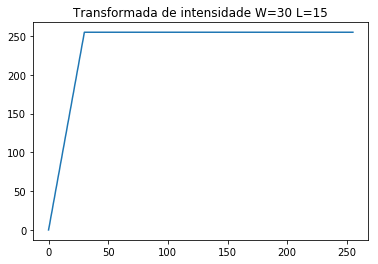

In [14]:
W = 30
L = 15
Tw = TWL(L,W)
plt.plot(Tw)
#plt.ylabel('Output intensity')
#plt.xlabel('Input intensity')
plt.title('Transformada de intensidade W=%d L=%d' % (W,L))

## Aplicando a Transformação de Contraste

Observe que esta transformação amplia o contraste ao redor do nível de
cinza 15, tornando os detalhes do paletó do "cameraman" bem visíveis:

""
"Imagem com contraste ajustado, L = 15, W = 30"

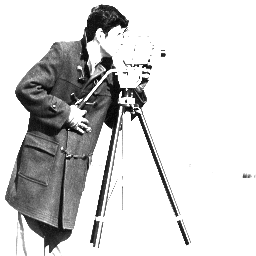

In [15]:
g = WL(f,L,W)
ia.adshow(g, 'Imagem com contraste ajustado, L = %d, W = %d' %(L,W))

## Visualizando o histograma da imagem com realce de contraste

Observe que quanto menor a largura da janela, mais pixels terão valores 0 e 255.
Quando de visualiza seu histograma, aparecerá um grande pico nestes dois valores
que são o extremo do histograma. Para evitar que estes valores entrem no plot,
faz-se um fatiamento do histograma do segundo pixel ao penúltimo: h[1:-1]. A
seguir mostramos o histograma contendo os valores 0 e 255 e depois não
utilizando estes valores:

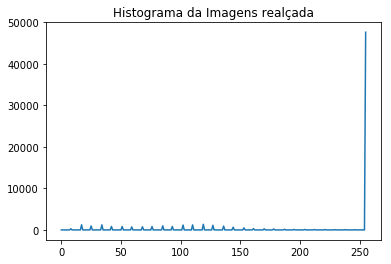

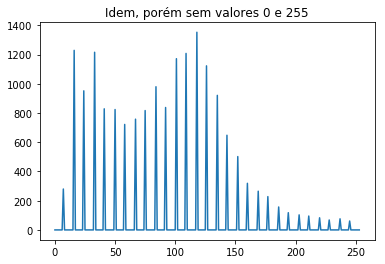

In [20]:
hg = ia.histogram(g)
plt.figure(1)
plt.plot(hg),plt.title('Histograma da Imagens realçada')
plt.show()
plt.figure(2)
plt.plot(hg[1:-1]),plt.title('Idem, porém sem valores 0 e 255')
plt.show()

## Links Interessantes

- [Demonstração interativa](http://adessowiki.fee.unicamp.br/adesso/wiki/Demo/ws_demo2/view/?usecache=0)
